In [1]:
SetDirectory["~/Documents/Univ/phase_space_stoc/git/num/maketype2/"]

SetOptions[{Plot, LogPlot, LogLogPlot, LogLinearPlot,
    ParametricPlot}, {Frame -> True, FrameStyle -> Black,
        ImageSize -> Large,
        LabelStyle -> Directive[Large, Black, FontFamily -> "Palatino"],
        PlotStyle -> AbsoluteThickness[3]}];
SetOptions[{ListPlot, ListLogPlot, ListLogLogPlot, ListLogLinearPlot,
    ListLinePlot}, {Frame -> True, FrameStyle -> Black,
        ImageSize -> Large,
        LabelStyle -> Directive[Large, Black, FontFamily -> "Palatino"],
        PlotStyle -> AbsoluteThickness[3], Joined -> True}];
SetOptions[{ContourPlot,ListContourPlot}, {Frame -> True, FrameStyle -> Black,
    LabelStyle -> Directive[Large, Black, FontFamily -> "Palatino"],
    ImageSize -> Large,
    AspectRatio -> 1/GoldenRatio}];

Color[1] := RGBColor["#5E81B5"]
Color[2] := RGBColor["#E19C24"]
Color[3] := RGBColor["#8FB032"]
Color[4] := RGBColor["#EB6235"]
Color[5] := RGBColor["#8778B3"]
Color[6] := RGBColor["#C56E1A"]

/Users/yuichirotada/Documents/Univ/phase_space_stoc/git/num/maketype2

# double_chaotic_SR

In [34]:
model = "double_chaotic";

In [45]:
fndata = Import["./"<>model <> "/Mn_" <> model <> "_SR.dat"];
trajdata = Import["./"<>model <> "/traj_" <> model <> "_SR.dat"];
calPdata = Import["./"<>model <> "/calP_" <> model <> "_SR.dat"];

In [49]:
datared=1;

In [50]:
f1List = Table[{fndata[[i, 1]], fndata[[i, 2]], fndata[[i, 3]]}, {i, 
    1, Length[fndata],datared}];
g2List = Table[{fndata[[i, 1]], fndata[[i, 2]], 
    Log10[fndata[[i, 4]]]}, {i, 1, Length[fndata], datared}];
phivschi = 
  Table[{trajdata[[i, 2]], trajdata[[i, 3]]}, {i, Length[trajdata]}];
meancalP = 
  Table[{calPdata[[i, 1]], calPdata[[i, 3]]}, {i, Length[calPdata]}];


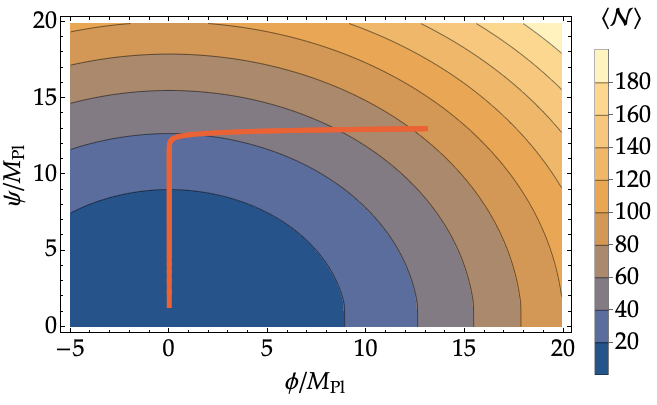

In [79]:
Show[ListContourPlot[f1List, 
  FrameLabel -> {"\[Phi]/\!\(\*SubscriptBox[\(M\), \(Pl\)]\)", 
    "\[Psi]/\!\(\*SubscriptBox[\(M\), \(Pl\)]\)"}, 
  PlotLegends -> 
   Placed[BarLegend[Automatic, 
     LegendLabel -> \[LeftAngleBracket]\[ScriptCapitalN]\
\[RightAngleBracket]], Right]], 
 ListPlot[phivschi, PlotStyle -> {{Color[4], AbsoluteThickness[5]}}]]


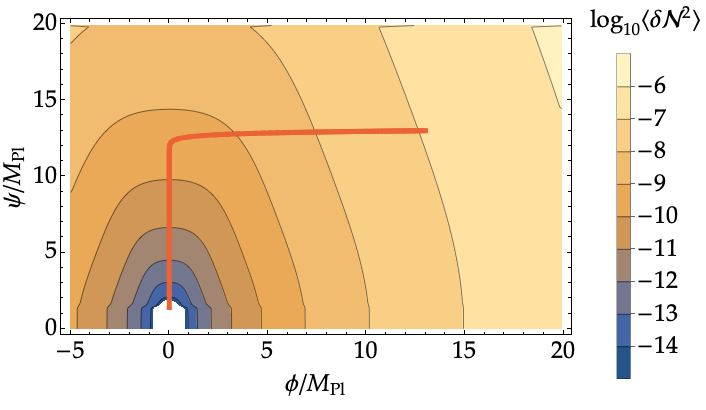

In [80]:
Show[ListContourPlot[g2List, 
  FrameLabel -> {"\[Phi]/\!\(\*SubscriptBox[\(M\), \(Pl\)]\)", 
    "\[Psi]/\!\(\*SubscriptBox[\(M\), \(Pl\)]\)"}, 
  PlotLegends -> 
   Placed[BarLegend[Automatic, 
     LegendLabel -> 
      "\!\(\*SubscriptBox[\(log\), \
\(10\)]\)\[LeftAngleBracket]\!\(\*SuperscriptBox[\(\[Delta]\
\[ScriptCapitalN]\), \(2\)]\)\[RightAngleBracket]"], Right]], 
 ListPlot[phivschi, PlotStyle -> {{Color[4], AbsoluteThickness[5]}}]]

In [81]:
dynfile = Import["../../../c++/output/doublechaotic_dyn.dat"];
calPcpp = Import["../../../c++/output/doublechaotic_spec.dat"];

In [83]:
aHList = Table[{dynfile[[i, 1]], dynfile[[i, 5]]}, {i, 
    Length[dynfile]}];

Nf = Last[aHList][[1]]

86.08

In [86]:
calPint = Interpolation[calPcpp];

calPcppvsN = 
  Table[{Nf - aHList[[i, 1]], calPint[aHList[[i, 2]]]}, {i, 
    Length[aHList]}];


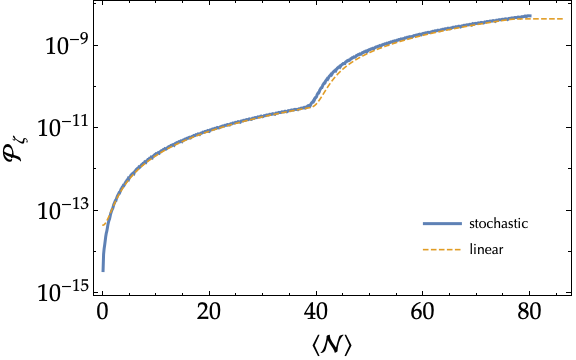

In [89]:
ListLogPlot[{meancalP, calPcppvsN}, 
 FrameLabel -> {\[LeftAngleBracket]\[ScriptCapitalN]\
\[RightAngleBracket], Subscript[\[ScriptCapitalP], \[Zeta]]}, 
 PlotStyle -> {AbsoluteThickness[3], Dashed}, 
 PlotLegends -> 
  Placed[LineLegend[{"stochastic", "linear"}, 
    LabelStyle -> 
     Directive[Larger, Black, FontFamily -> "Optima"]], {0.8, 0.2}]]

# hybrid_SR

In [13]:
model="hybrid";

In [26]:
fndata =Sort[Select[ Import["./"<>model <> "/Mn_" <> model <> "_SR.dat"],#[[2]]>0&]];
trajdata = Import["./"<>model <> "/traj_" <> model <> "_SR.dat"];
calPdata = Import["./"<>model <> "/calP_" <> model <> "_SR.dat"];

In [29]:
datared=1;

In [30]:
f1List = Table[{fndata[[i, 1]], Log10[fndata[[i, 2]]], 
    fndata[[i, 3]]}, {i, 1, Length[fndata], datared}];
g2List = Table[{fndata[[i, 1]], Log10[fndata[[i, 2]]], 
    Log10[fndata[[i, 4]]]}, {i, 1, Length[fndata], datared}];
phivschi = 
  Table[{trajdata[[i, 2]], Log10[Abs[trajdata[[i, 3]]]]}, {i, 
    Length[trajdata]}];
Ndata = Table[{trajdata[[i, 1]], trajdata[[i, 4]]}, {i, 
    Length[trajdata]}];
dN2data = 
  Table[{trajdata[[i, 1]], trajdata[[i, 5]]}, {i, Length[trajdata]}];
meandN2 = 
  Table[{calPdata[[i, 1]], calPdata[[i, 2]]}, {i, Length[calPdata]}];
meancalP = 
  Table[{calPdata[[i, 1]], calPdata[[i, 3]]}, {i, Length[calPdata]}];


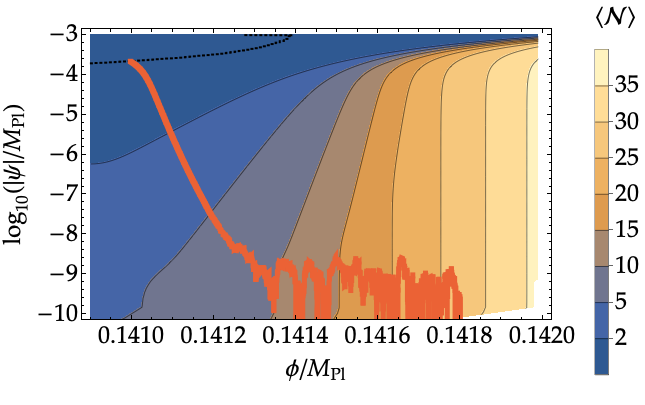

In [37]:
Ncontour = 
 Show[ListContourPlot[f1List, 
   FrameLabel -> {"\[Phi]/\!\(\*SubscriptBox[\(M\), \(Pl\)]\)", 
     "\!\(\*SubscriptBox[\(log\), \
\(10\)]\)(|\[Psi]|/\!\(\*SubscriptBox[\(M\), \(Pl\)]\))"}, 
   PlotLegends -> 
    Placed[BarLegend[Automatic, 
      LegendLabel -> \[LeftAngleBracket]\[ScriptCapitalN]\
\[RightAngleBracket]], Right], 
   PlotRange -> {{0.1409, 0.142}, {-10, -3}}, 
   AspectRatio -> 1/GoldenRatio, 
   Contours -> {{0, {Thick, Dotted}}, 2, 5, 10, 15, 20, 25, 30, 35}], 
  ListPlot[phivschi, PlotStyle -> {{Color[4], AbsoluteThickness[5]}}]]


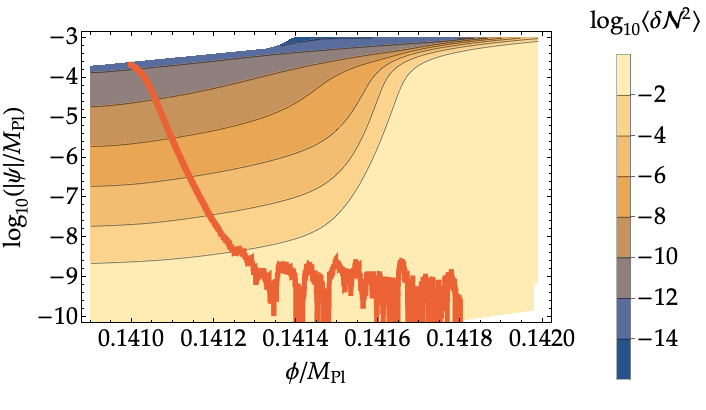

In [38]:
dN2contour = 
 Show[ListContourPlot[g2List, 
   FrameLabel -> {"\[Phi]/\!\(\*SubscriptBox[\(M\), \(Pl\)]\)", 
     "\!\(\*SubscriptBox[\(log\), \
\(10\)]\)(|\[Psi]|/\!\(\*SubscriptBox[\(M\), \(Pl\)]\))"}, 
   PlotLegends -> 
    Placed[BarLegend[Automatic, 
      LegendLabel -> 
       "\!\(\*SubscriptBox[\(log\), \
\(10\)]\)\[LeftAngleBracket]\!\(\*SuperscriptBox[\(\[Delta]\
\[ScriptCapitalN]\), \(2\)]\)\[RightAngleBracket]"], Right], 
   PlotRange -> {{0.1409, 0.142}, {-10, -3}}, 
   AspectRatio -> 1/GoldenRatio], 
  ListPlot[phivschi, PlotStyle -> {{Color[4], AbsoluteThickness[5]}}]]

In [62]:
As = 2.189 10^-9;
\[CapitalPi]2 = 50;
M = 0.1;
\[Phi]c = 0.1 Sqrt[2];
\[Mu]2 = 11;
\[Mu]1 = \[CapitalPi]2/(M^2 \[Phi]c)
\[CapitalLambda]4 = 12 \[Pi]^2 As/\[Mu]1^2

Out[67]:
 
 
 35355.3 
 
 Out[68]:
 
 
 -16
2.07404 10

In [69]:
\[Psi]0 = 
 Sqrt[(Sqrt[2] \[CapitalLambda]4 M \[Phi]c^(1/2) \[Mu]1^(1/2))/(
  96 \[Pi]^(3/2))]
\[Chi]2 = Log[(\[Phi]c^(1/2) M)/(2 \[Mu]1^(1/2) \[Psi]0)]

Out[69]:
 
 
 -9
1.96975 10 
 
 Out[70]:
 
 
 10.835

In [71]:
N1 = (Sqrt[\[Chi]2] M \[Phi]c^(1/2) \[Mu]1^(1/2))/2
N2 = (M \[Phi]c^(1/2) \[Mu]1^(1/2))/(4 Sqrt[\[Chi]2])

Out[71]:
 
 
 11.6378 
 
 Out[72]:
 
 
 0.537044

In [73]:
\[Xi]k[NN_] = -((N1 + N2 - NN)/(\[Phi]c \[Mu]1));
\[Chi]k[NN_] = (4 \[Phi]c \[Mu]1 \[Xi]k[NN]^2)/M^2;
\[Psi]k[NN_] = \[Psi]0 Exp[\[Chi]k[NN]];

In [76]:
calPCG[NN_] = (\[CapitalLambda]4 M^2 \[Phi]c \[Mu]1)/(
  192 \[Pi]^2 \[Chi]2 \[Psi]k[NN]^2);

In [78]:
intcalP = Interpolation[meancalP];


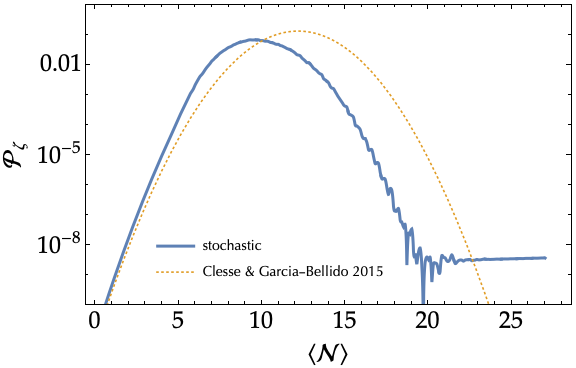

In [79]:
LogPlot[{Abs[intcalP[NN]], calPCG[NN]}, {NN, 0, 28}, 
 FrameLabel -> {\[LeftAngleBracket]\[ScriptCapitalN]\
\[RightAngleBracket], Subscript[\[ScriptCapitalP], \[Zeta]]}, 
 PlotRange -> {10^-10, 1}, 
 PlotLegends -> 
  Placed[LineLegend[{"stochastic", "Clesse & Garcia-Bellido 2015"}, 
    LabelStyle -> 
     Directive[Larger, Black, FontFamily -> "Optima"]], {0.38, 0.15}],
  PlotStyle -> {AbsoluteThickness[3], Dotted}]